# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar datos aquí
df = pd.read_csv('largest_us_retailers.csv')
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
df_1 = df[['Company', 'Sales']].sort_values(by=['Sales'], ascending=False)
df_1= df_1.iloc[1:25]
answer_1=df_1.mean()
answer_1

Sales    46602.416667
dtype: float64

CONCLUSIONES: Al eliminar la compañia dominante de nuestro análisis se observa que el promedio en ventas es de 46602.4 USD, sin embargo, esto no indica que cda una de las compañias analizadas tenga unas ventas promedio de este valor. Para obtener un análisis más preciso se empleará un histograma en el siguiente ejercicio.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

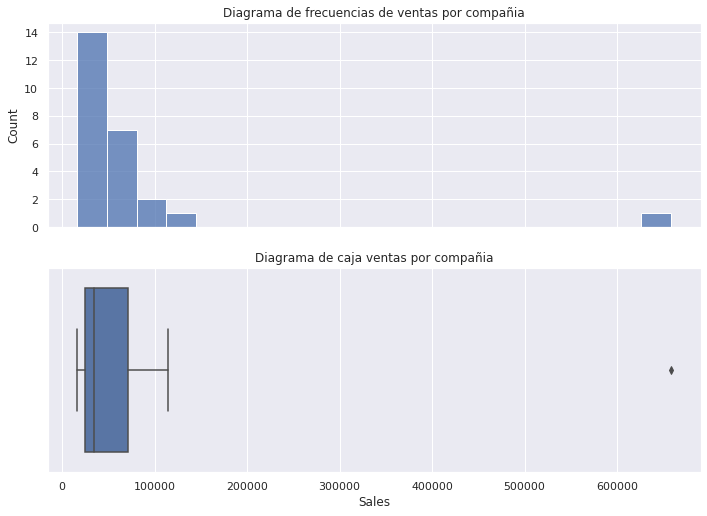

In [ ]:
# df['Sales'].plot.hist(bins=10)
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True)
h=sns.histplot(df['Sales'], ax=ax_hist)
c=sns.boxplot(df['Sales'], ax=ax_box)
h.set_title('Diagrama de frecuencias de ventas por compañia')
c.set_title('Diagrama de caja ventas por compañia')
ax_hist.set(xlabel='')

CONCLUSIONES: En este ejercicio se puede observar claramente que una de las compañias posee un nivel de ventas mucho mayor respecto a las otras compañias del sector (valor atipico), las cuales no resultan ser una competencia. Asi, por medio del histograma y el diagrama de caja se puede observar que el minimo y el máximo de ventas de las compañias es 10000 y 110000 Millones de USD respectivamente. Por otro lado, se observa que la mayoria de compañias se sitúan con un valor de ventas entre el cuartil Q1 y Q3 es decir entre 20000 y 70000 Millones de USD.

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

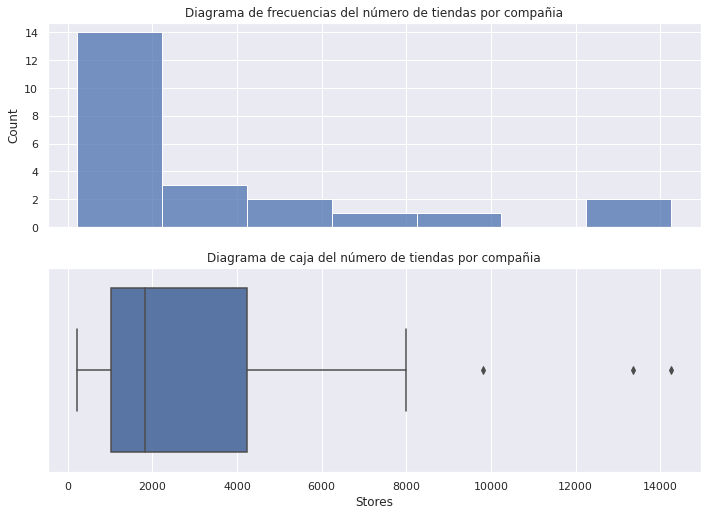

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True)
h=sns.histplot(df['Stores'], ax=ax_hist)
c=sns.boxplot(df['Stores'], ax=ax_box)
h.set_title('Diagrama de frecuencias del número de tiendas por compañia')
c.set_title('Diagrama de caja del número de tiendas por compañia')

ax_hist.set(xlabel='')

CONCLUSIONES: En este caso se logra observar que la mayoria de compañias tienen entre 1000 y 4200 tiendas ya que este es el intervalo donde se agrupa el cuartil Q1 y Q3. En este caso se logra observar 3 casos atipicos los cuales se encuentran fuera del rango máximo, el cual se posiciona en 8000 tiendas, el minimo se encuentra alrededor de 200 tiendas.

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

Text(0.5, 1.0, 'Diagrama de disperción - ventas según número de tiendas')

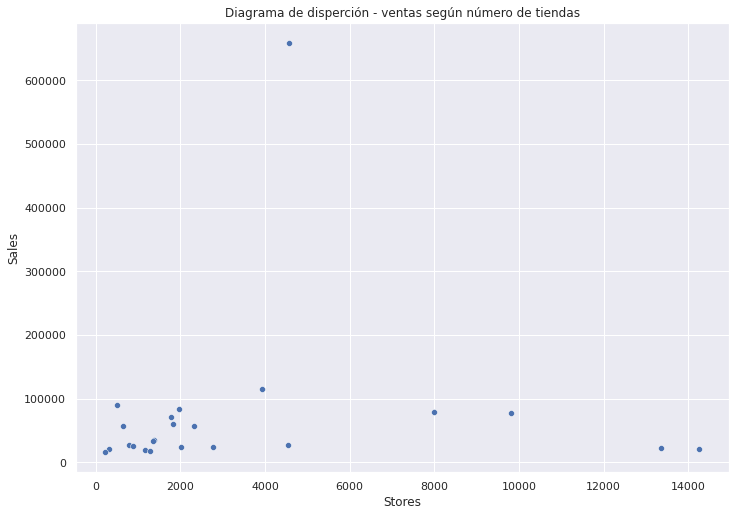

In [ ]:
df_4=df_1
df_4 = df.sort_values(by=['Sales'], ascending=False)
s=sns.scatterplot(data=df_4, x = 'Stores', y = 'Sales')
s.set_title('Diagrama de disperción - ventas según número de tiendas')


CONCLUSIONES: Al utilizar una grafica de disperción para observar la relación entre las ventas y el número de tiendas no se logra observar una tendencia, por lo que se concluye que estas variables no se encuentran relacionadas, ya que para un número similar de ventas se observa compañias con diferente cantidad de tiendas.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
rango = df['Sales'].max() - df['Sales'].min()
rango

641527

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Diagrama de caja de ventas compañia')

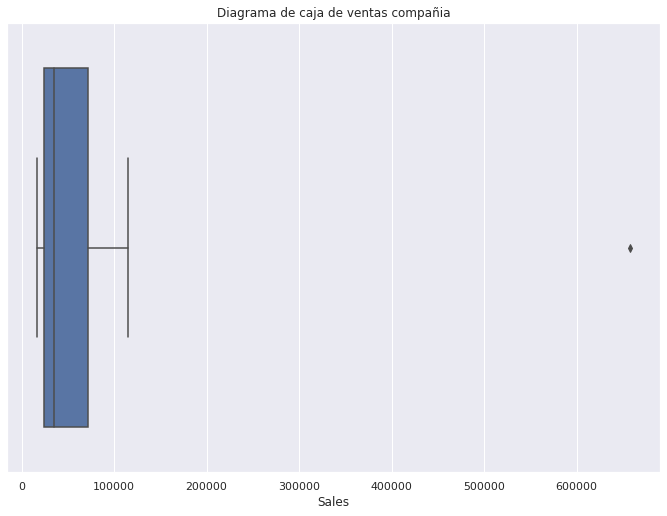

In [ ]:
c=sns.boxplot(df['Sales'])
c.set_title('Diagrama de caja de ventas compañia')


CONCLUSIONES: El rango de ventas de esta dataset es 641527 Millones de USD, sin embargo, se puede observar un outlier generado por la compañia dominante, de esta manera la mayoria de datos se encuentran entre 10000 y 110000 Millones de USD aproximadamente.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [ ]:
df_6 = df[['Company', 'Stores']].sort_values(by=['Stores'], ascending=False)
df_6.head(5)

,Company,Stores
20,Dollar Tree,14250.0
19,Dollar General,13350.0
5,CVS incl. Target,9813.0
4,Walgreen Boots,8002.0
0,Walmart US,4574.0


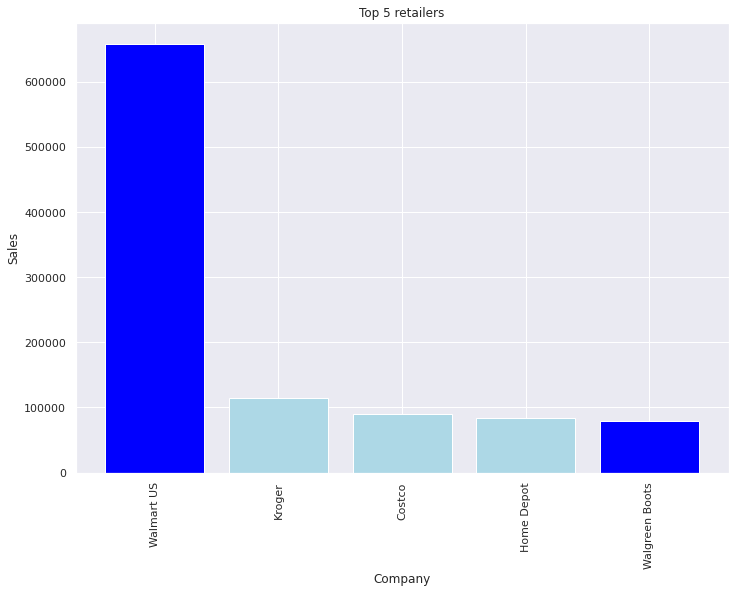

In [ ]:
df_sorted = df.sort_values(by=['Sales'], ascending=False)
x = df_sorted['Company'][0:5] #Aplicamos slicing como en una lista de Python.
y = df_sorted['Sales'][0:5]

plt.bar(x, y, color=['blue', '#ADD8E6', '#ADD8E6', '#ADD8E6','blue'])
plt.title('Top 5 retailers')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') 

plt.show()

CONCLUSION: Las compañias con mayor cantidad de tiendas fueron Dollar Tree, Dollar General, CSV incl. Target, Walgreen Boots y Walmart. Por otro lado, el diagrama de barras muestra las compañias con mayor cantidad de ventas, concluyendo que de las 5 compañias con más tiendas físicas solo dos se encuentran en el top 5 de ventas, estas compañias son Walmart US y Walgreen Boots (Barras azul oscuro).


## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [ ]:
df_7 = df[['Category', 'Sales']]
df_7 = df_7.groupby('Category').agg({'Sales': np.sum}).sort_values(by='Sales', ascending=False)
df_7=df_7.reset_index()
df_7.head(3)

,Category,Sales
0,Supercenters,745919
1,Grocery,297164
2,Drug Stores,184202


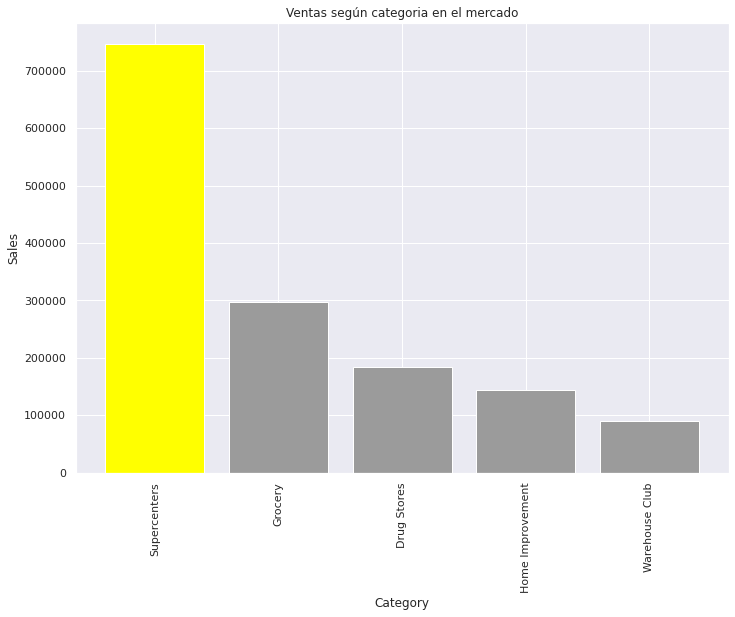

In [ ]:
x = df_7['Category'][0:5] #Aplicamos slicing como en una lista de Python.
y = df_7['Sales'][0:5]

plt.bar(x, y, color=['#FFFF00', '#9B9B9B', '#9B9B9B', '#9B9B9B','#9B9B9B'])
plt.title('Ventas según categoria en el mercado')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation='vertical') 

plt.show()

CONCLUSIONES: Al organizar las ventas a partir de sus categorias se encontró que la categoria con mayor número de ventas es 'Supercenters' seguido por 'Grocery' y 'Drug Stores'

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [ ]:
df['Sales/Stores'] = df['Sales']/df['Stores']
df_8 = df[['Company', 'Sales/Stores']].sort_values(by=['Sales/Stores'], ascending=False)
df_8.head(1)

,Company,Sales/Stores
2,Costco,181.915152


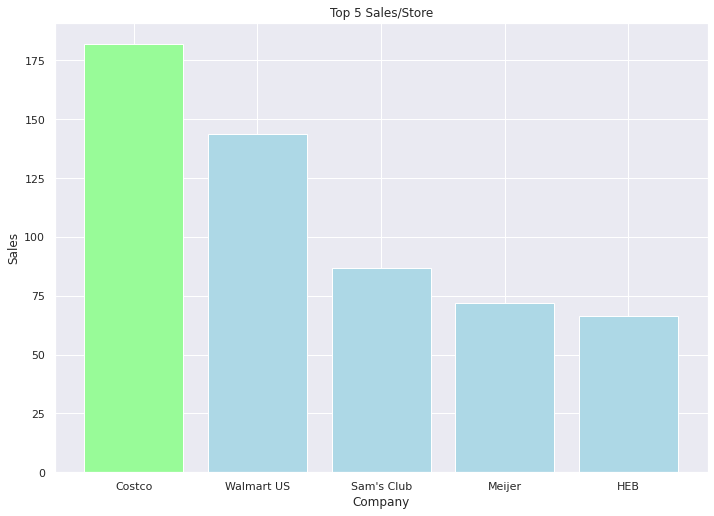

In [ ]:
df['Sales/Stores'] = df['Sales']/df['Stores']
df_8 = df[['Company', 'Sales/Stores']].sort_values(by=['Sales/Stores'], ascending=False)
x = df_8['Company'][0:5] 
y = df_8['Sales/Stores'][0:5]

plt.bar(x, y, color=['#98FB98', '#ADD8E6', '#ADD8E6', '#ADD8E6', '#ADD8E6'])
plt.title('Top 5 Sales/Store')
plt.xlabel('Company')
plt.ylabel('Sales')
plt.xticks(rotation='horizontal') 
plt.show()

CONCLUSION: La compañia con mejor relacion entre sus ventas y número de tiendas fisicas es Costco(Verde claro en el grafico de barras), la cual tiene una capacidad de ventas de alrededor de 175 millones de USD por tienda.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
df_9=df[['Company', 'Sales','Stores']]
df_9=df_9[df_9['Stores'].isnull()]
df_9

,Company,Sales,Stores
6,Amazon,71687,NaN
11,Apple incl. Online,37664,NaN


CONCLUSIONES: Como se establecio en el ejercicio N°2 la mayoria de compañias poseen ventas entre 20000 y 70000 Millones de USD, por lo que las ventas en compañias que no poseen tiendas fisicas (Amazon y Apple) no destacan sobre las compañias que tienen tiendas fisicas, ya que sus ventas se encuentran entre este rango.

## III. Tus propias preguntas

### 10. ¿Existe alguna relación entre la cantidad de ventas y el número de tiendas según la categoria de los productos de cada compañia?

Text(0.5, 1.0, 'Diagrama de disperción - stores según número de ventas por categoria')

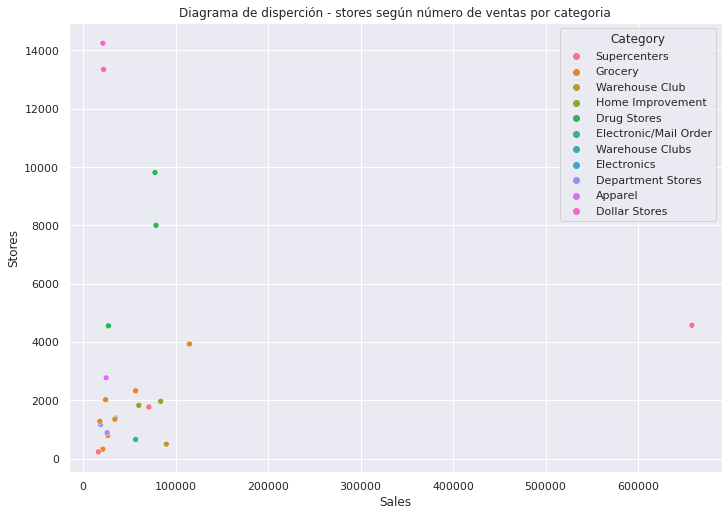

In [ ]:
df_9=df[['Company', 'Sales', 'Stores','Category']]
s=sns.scatterplot(data=df_9, x = 'Sales', y = 'Stores', hue = 'Category')
s.set_title('Diagrama de disperción - stores según número de ventas por categoria')


CONCLUSION: No existe una relación entre el número de tiendas y las ventas que se pueden obtener según la categoria de los productos, de hecho en la grafica de dispersión se observa que diferentes compañias con productos de una misma categoria pueden tener más o menos cantidad de tiendas sin tener una relacion directa en sus ventas.

### 11. ¿Cuál es el TOP 5 de compañias con mayor y menor número de ventas? A partir de los datos es recomendable crear una compañia en una categoria especifica para obtener mejores ventas?

In [ ]:
df_11=df[['Company', 'Sales', 'Category']].sort_values(by=['Sales'], ascending=True)
df_11.head(5)

,Company,Sales,Category
24,Meijer,16592,Supercenters
23,Delhaize,18201,Grocery
22,Kohl's,19060,Department Stores
21,HEB,21384,Grocery
20,Dollar Tree,21464,Dollar Stores


In [ ]:
df_11=df[['Company', 'Sales', 'Category']].sort_values(by=['Sales'], ascending=False)
df_11.head(5)

,Company,Sales,Category
0,Walmart US,658119,Supercenters
1,Kroger,115037,Grocery
2,Costco,90048,Warehouse Club
3,Home Depot,83976,Home Improvement
4,Walgreen Boots,78924,Drug Stores


CONCLUSION: A partir de las tablas generadas se puede observar que compañias en las categorias de 'Groceriy' y 'Supercenters´se encuentran tanto en las de mayores ventas como en las de menores, por lo que no hay una relación entre estas categorias y las ventas. Además, se encuentran otras categorias propias tanto del TOP 5 de mayores ventas como el TOP 5 de peores ventas, sin embargo, debido a la muestra de compañias analizadas no es posible generar una respuesta certera acerca de que categoria sería mejor implementar para obtener mejores ventas.

### 12. Sin tener en cuenta la compañia dominante ¿Qué categoria genera el mayor número de ventas? ¿Cuál es el porcentaje de influencia en las ventas globales por cada categoria?

In [ ]:
df_12 = df[['Category', 'Sales']]
df_12 = df_12.groupby('Category').agg({'Sales': np.sum}).sort_values(by='Sales', ascending=False)
df_12 = df_12.iloc[1::]
df_12=df_12.reset_index()
df_12

,Category,Sales
0,Grocery,297164
1,Drug Stores,184202
2,Home Improvement,144287
3,Warehouse Club,90048
4,Electronic/Mail Order,71687
5,Warehouse Clubs,56828
6,Department Stores,45088
7,Dollar Stores,43698
8,Electronics,34980
9,Apparel,25012


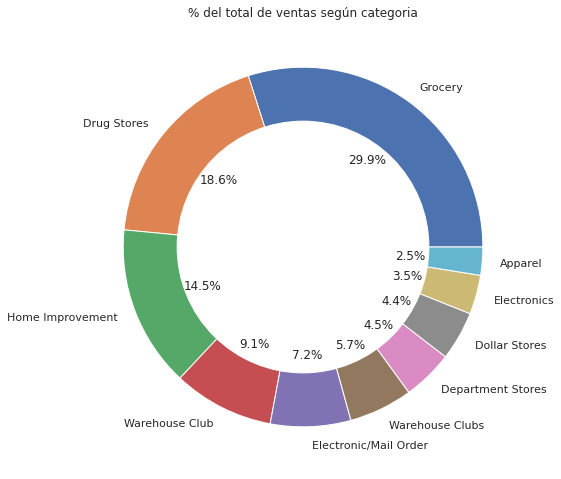

In [ ]:
# Create a pieplot
plt.pie(df_12['Sales'], labels=df_12['Category'], autopct='%.1f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% del total de ventas según categoria')

plt.show()

CONCLUSION: Como se observa en la grafica de dona existen 2 categorias que poseen cerca de la mitad de ventas en Millones de USD en el mercado (48.5%), estas son 'Grocery' y 'Drug Stores', donde la que mayores ventas posee es grocery con 297164 Millones de USD, como se logra observar en la tabla de agregación de ventas por categoria. La categoria con menor número de ventas es 'Apparel' con tan solo 2.5% en el mercado. 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9cc316be-ef5c-4741-b424-7a914f1ea4bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>